In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploration of Class A, Ship 1, Gas Turbine Generator

In [2]:
A1_allGTG = pd.read_csv('hackthemachine-data/classA_ship1_allGTG.csv')
# A1_allGTG_noDups = A1_allGTG.drop_duplicates().to_csv('classA_ship1_allGTG_noDups1.csv')

In [3]:
A1_allGTG.dtypes

DateTime                object
VOLTAGE                float64
TURBINE INLET TEMP     float64
TURB OVER TEMP           int64
SW PUMP DIS PRES         int64
STATOR HIGHEST TEMP      int64
STATOR 6 TEMP          float64
STATOR 5 TEMP          float64
STATOR 4 TEMP          float64
STATOR 3 TEMP          float64
STATOR 2 TEMP          float64
STATOR 1 TEMP          float64
POWER FACTOR           float64
POWER                  float64
LUBE OIL FILTER DP     float64
LO SUMP LEVEL: 1=N       int64
HP AIR PRES              int64
GEN SW STRNR DP        float64
GEN LO PRES            float64
GEN LO LEVEL:1=N         int64
GEN LO CLR OUT PRES    float64
GEN LO CLR IN PRES     float64
GEN BEARING TEMP       float64
GEN AIR TEMP             int64
GEN AIR CLR OUT P        int64
GEN AIR CLR IN P         int64
GEARBOX OIL PRES         int64
FUEL OIL HEAD PRES       int64
FUEL OIL HEAD  TEMP      int64
FUEL MANIFOLD PRES       int64
FUEL FILTER DP         float64
FREQUENCY              float64
EXCTR BE

In [4]:
A1_allGTG.indicator.unique()

array(['GTG1', 'GTG2', 'GTG3'], dtype=object)

In [5]:
# Covert DateTime to datetime dtype, sort by datetime, and reindex
A1_allGTG['DateTime'] = pd.to_datetime(A1_allGTG.DateTime)
A1_allGTG.sort_values('DateTime',inplace=True)
A1_allGTG = A1_allGTG.reset_index(drop=True)

## Split vessel data by system
- Split system dataset into training and test sets (66.7%, 33.3% respectively)
- Export new splits to csv

In [6]:
A1_GTG1 = A1_allGTG.loc[A1_allGTG['indicator'] == 'GTG1']
A1_GTG1 = A1_GTG1.reset_index(drop=True)
A1_GTG1.drop('indicator',axis = 1, inplace=True)
#A1_GTG1.plot(subplots=True, figsize=(10, 50)); plt.legend(loc='best')
A1_GTG1.to_csv('A1_GTG1.csv',index=False)

# split data set
train=A1_GTG1.sample(frac=0.667,random_state=200)
test=A1_GTG1.drop(train.index)
# convert to CSV
train.to_csv('SplitData/A1_GTG1_training.csv',index=False)
test.to_csv('SplitData/A1_GTG1_test.csv',index=False)

In [7]:
A1_GTG2 = A1_allGTG.loc[A1_allGTG['indicator'] == 'GTG2']
A1_GTG2 = A1_GTG2.reset_index(drop=True)
A1_GTG2.drop('indicator',axis = 1, inplace=True)
# A1_GTG2.plot(subplots=True, figsize=(10, 50)); plt.legend(loc='best')
A1_GTG2.to_csv('A1_GTG2.csv',index=False)

# split data set
train=A1_GTG2.sample(frac=0.667,random_state=200)
test=A1_GTG2.drop(train.index)
# convert to CSV
train.to_csv('SplitData/A1_GTG2_training.csv',index=False)
test.to_csv('SplitData/A1_GTG2_test.csv',index=False)

In [8]:
A1_GTG3 = A1_allGTG.loc[A1_allGTG['indicator'] == 'GTG3']
A1_GTG3 = A1_GTG3.reset_index(drop=True)
A1_GTG3.drop('indicator',axis = 1, inplace=True)
# A1_GTG3.plot(subplots=True, figsize=(10, 50)); plt.legend(loc='best')
A1_GTG3.to_csv('A1_GTG3.csv',index=False)

# split data set
train=A1_GTG3.sample(frac=0.667,random_state=200)
test=A1_GTG3.drop(train.index)
# convert to CSV
train.to_csv('SplitData/A1_GTG3_training.csv',index=False)
test.to_csv('SplitData/A1_GTG3_test.csv',index=False)

# Create plots for each sensor on A1

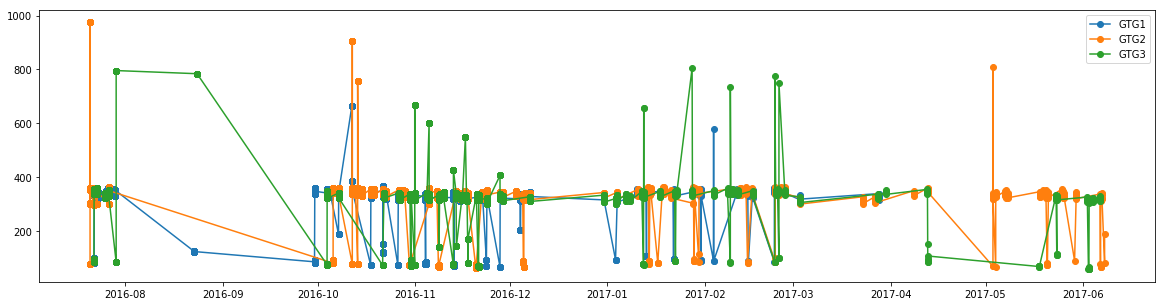

In [9]:
# Create time series plot of all systems for Turbine Inlet Temp
plt.figure(figsize=(20,5))
for key, grp in A1_allGTG.groupby(['indicator']):
    plt.plot(grp['DateTime'],grp['TURBINE INLET TEMP'], label=key, marker='o');    
plt.legend(loc='best')    
plt.show()

In [10]:
print(A1_GTG1['DateTime'].head(5))
print(A1_GTG2['DateTime'].head(5))
print(A1_GTG2['DateTime'].head(5))

print(A1_GTG1['DateTime'].tail(5)) # This system stops collecting in 2017-03 while other 2 stop in 2017-06
print(A1_GTG2['DateTime'].tail(5))
print(A1_GTG2['DateTime'].tail(5))



0   2016-07-22 01:44:00
1   2016-07-22 01:44:00
2   2016-07-22 01:44:00
3   2016-07-22 01:44:00
4   2016-07-22 01:44:00
Name: DateTime, dtype: datetime64[ns]
0   2016-07-20 18:21:57
1   2016-07-20 18:21:57
2   2016-07-20 18:21:57
3   2016-07-20 18:21:57
4   2016-07-20 18:21:57
Name: DateTime, dtype: datetime64[ns]
0   2016-07-20 18:21:57
1   2016-07-20 18:21:57
2   2016-07-20 18:21:57
3   2016-07-20 18:21:57
4   2016-07-20 18:21:57
Name: DateTime, dtype: datetime64[ns]
2195   2017-03-28 03:50:00
2196   2017-03-28 03:50:00
2197   2017-03-28 03:51:00
2198   2017-03-28 03:51:00
2199   2017-03-28 03:51:00
Name: DateTime, dtype: datetime64[ns]
2413   2017-06-06 22:59:17
2414   2017-06-06 22:59:21
2415   2017-06-06 22:59:23
2416   2017-06-07 19:00:58
2417   2017-06-07 19:00:59
Name: DateTime, dtype: datetime64[ns]
2413   2017-06-06 22:59:17
2414   2017-06-06 22:59:21
2415   2017-06-06 22:59:23
2416   2017-06-07 19:00:58
2417   2017-06-07 19:00:59
Name: DateTime, dtype: datetime64[ns]


In [11]:
colNames = list(A1_allGTG.columns)
colNames.remove('DateTime')
colNames.remove('indicator')


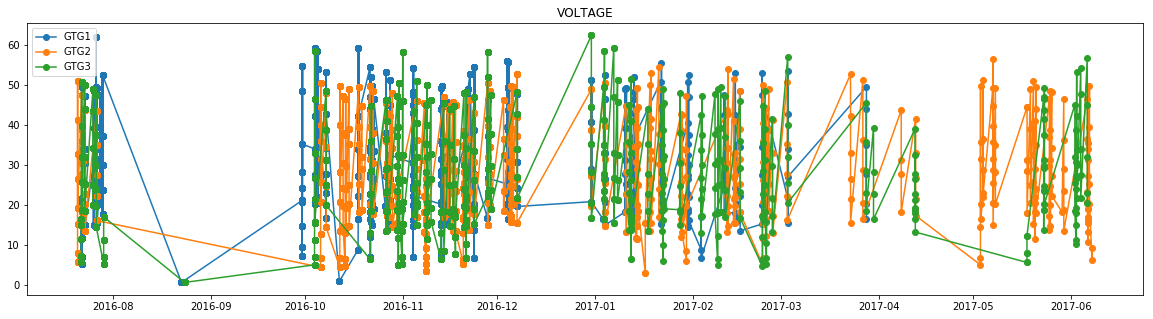

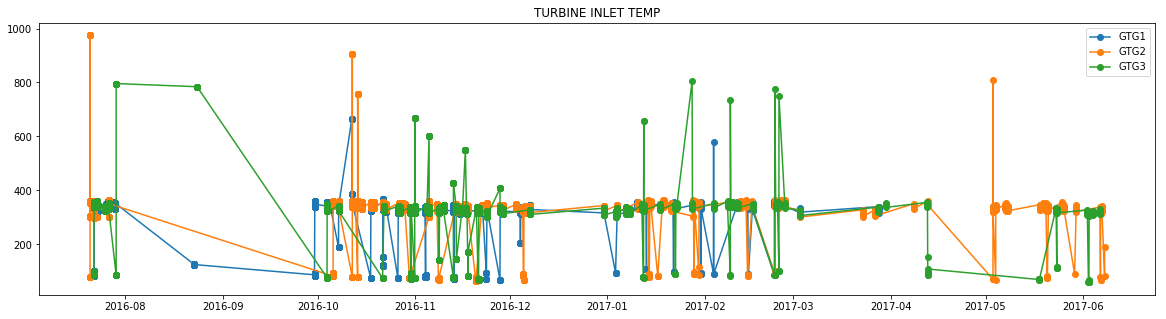

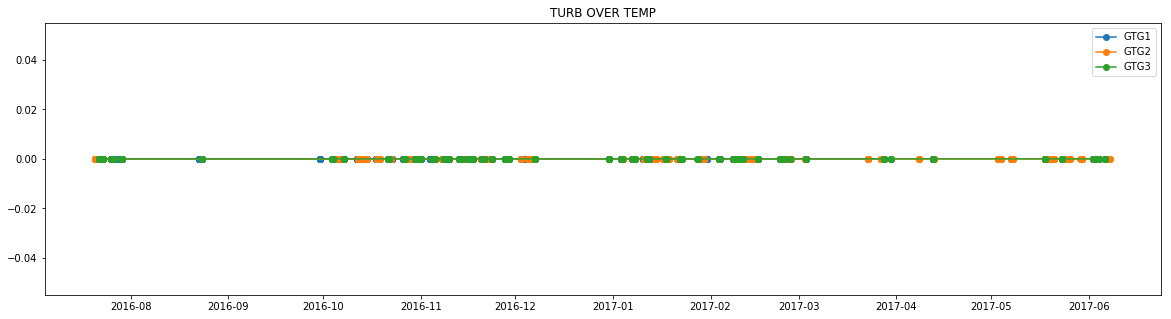

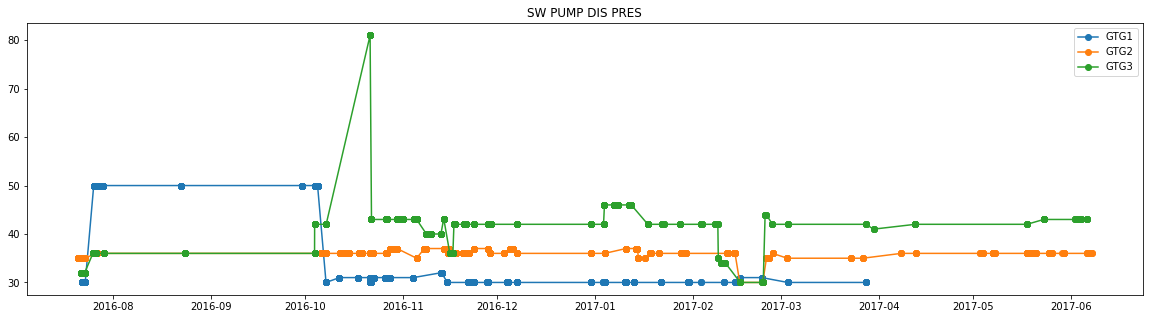

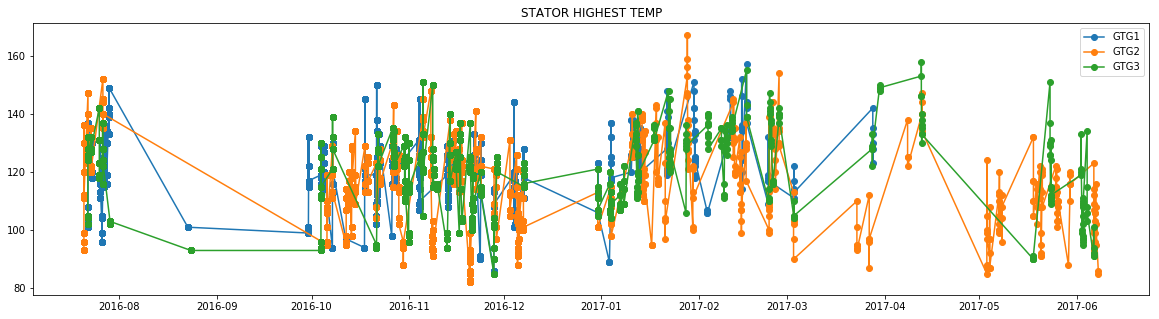

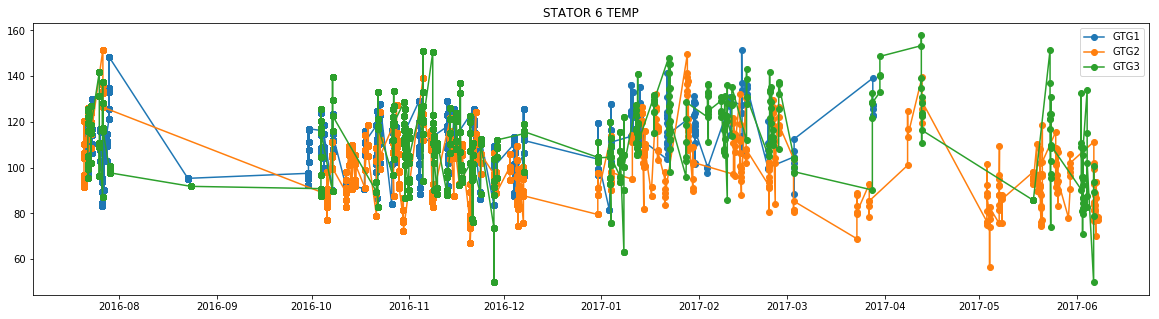

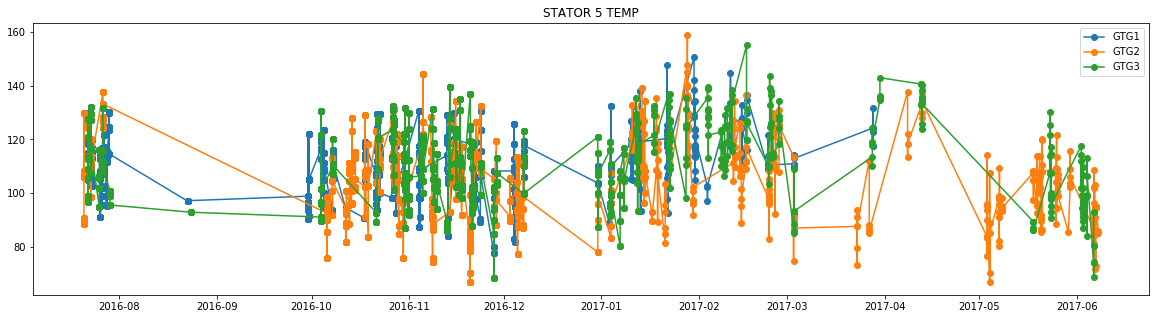

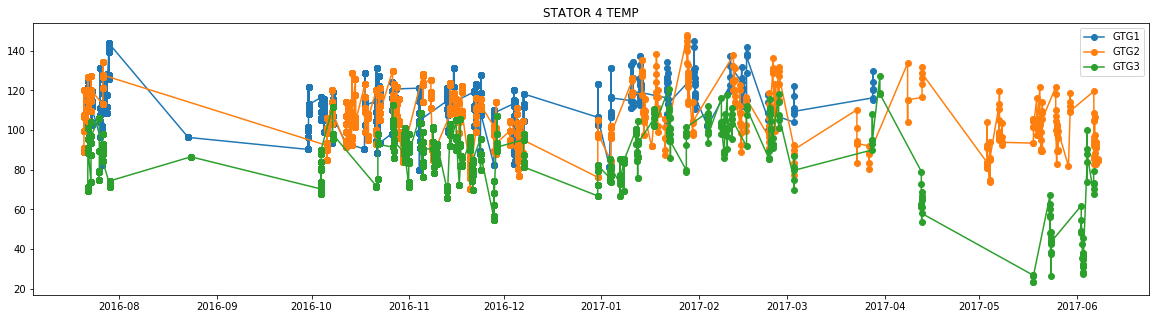

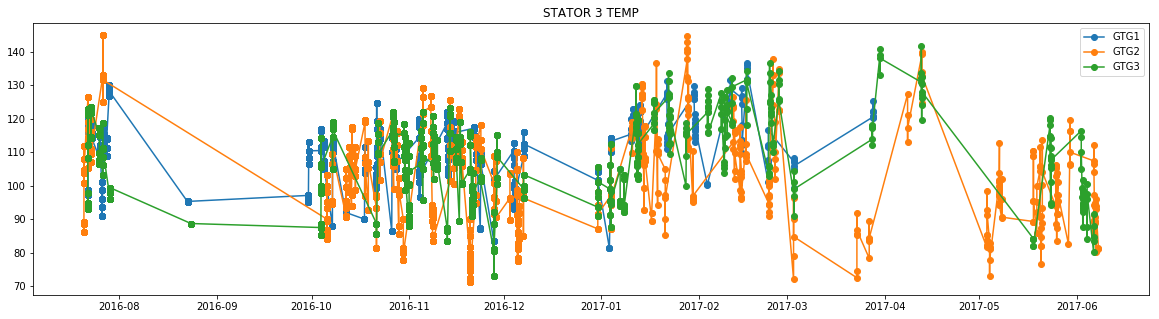

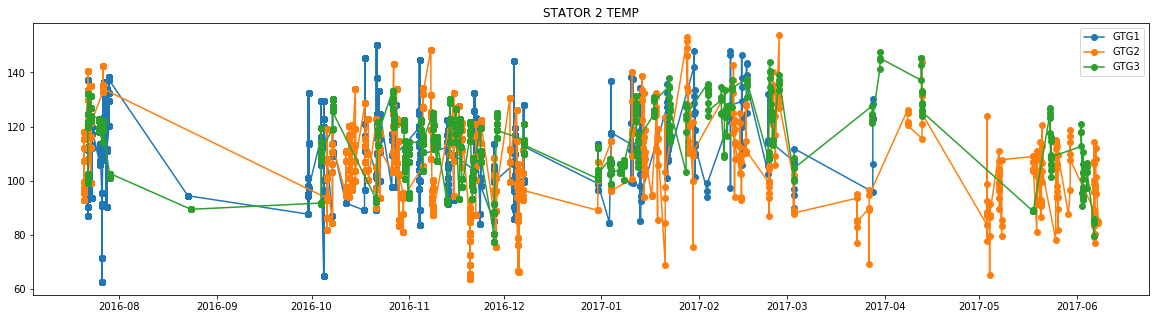

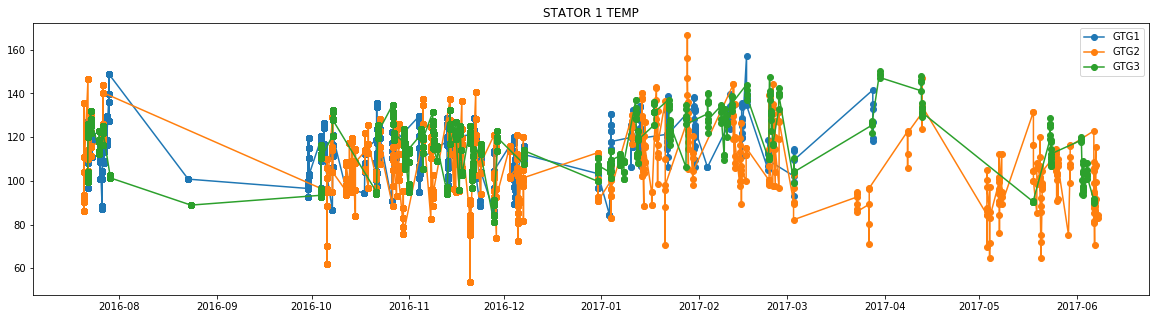

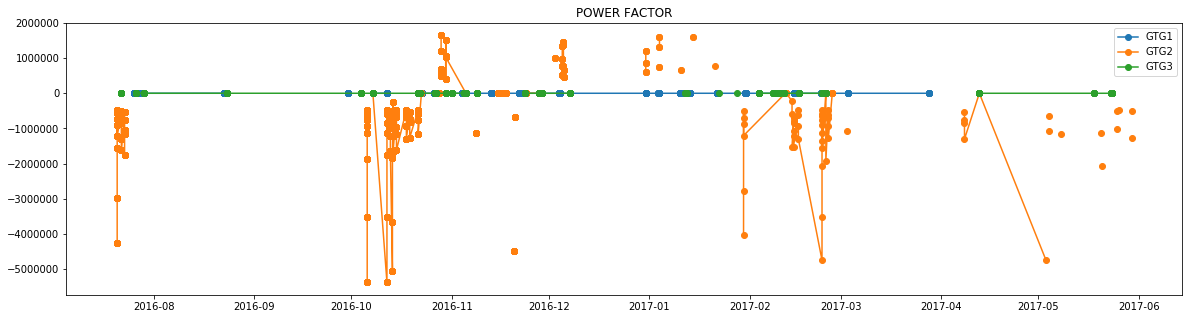

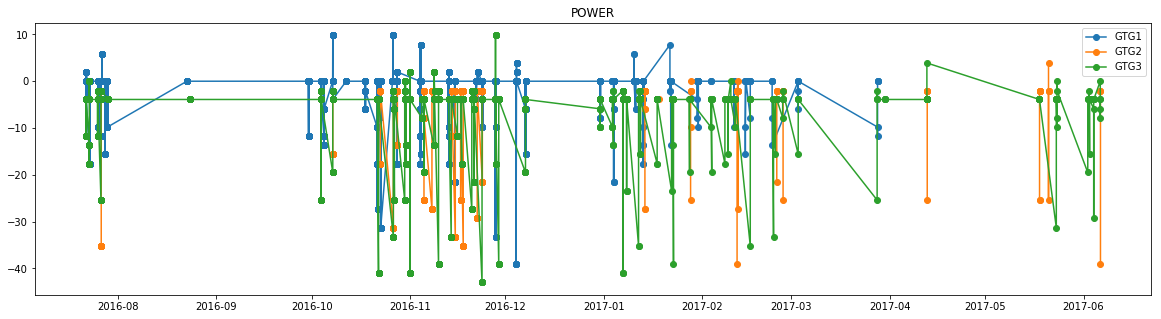

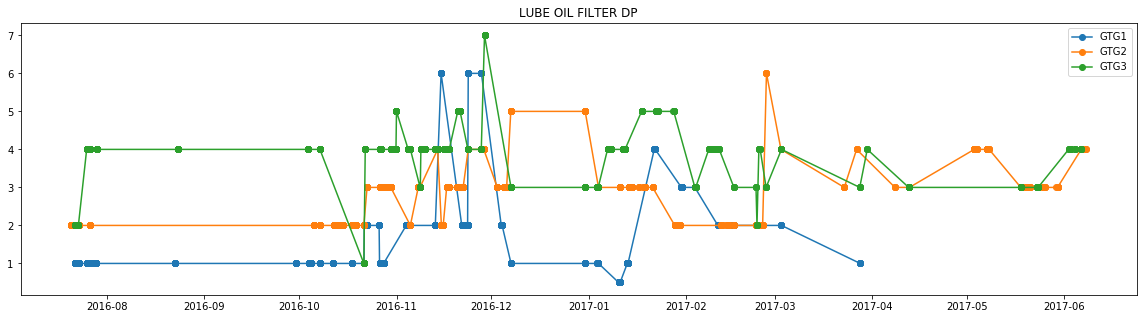

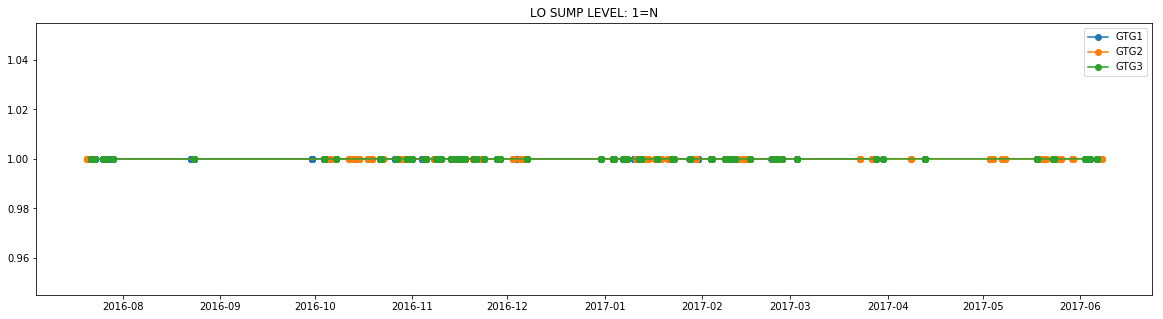

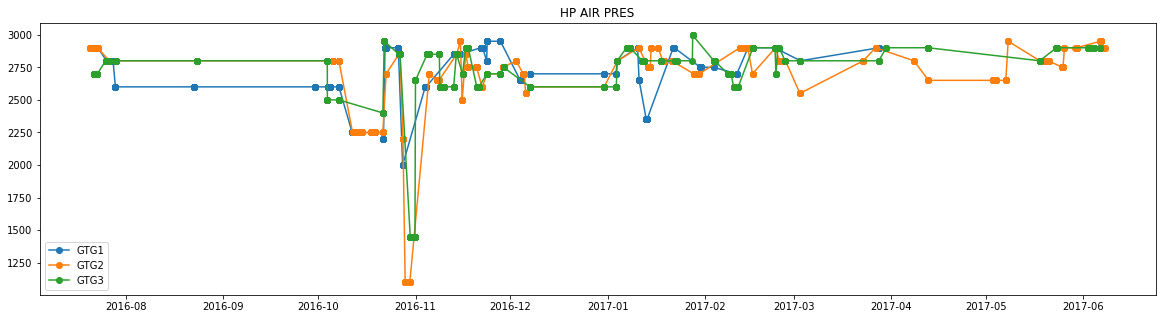

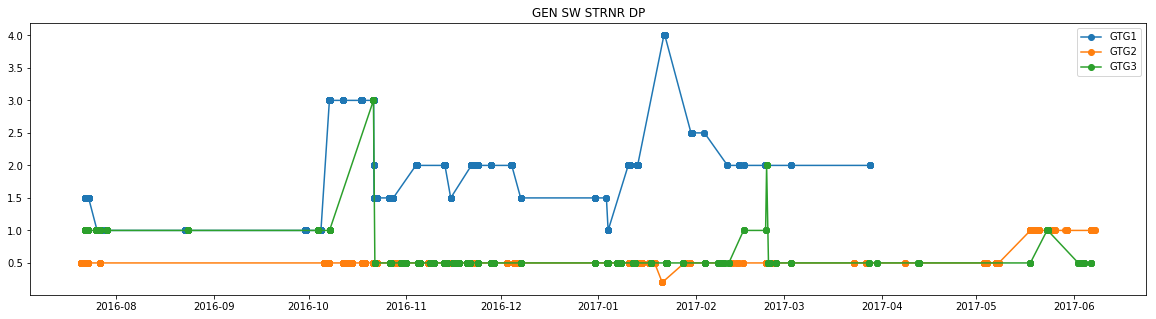

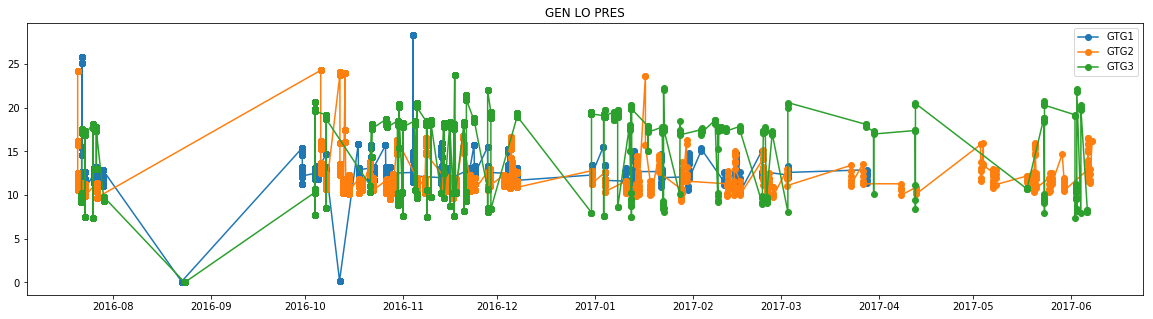

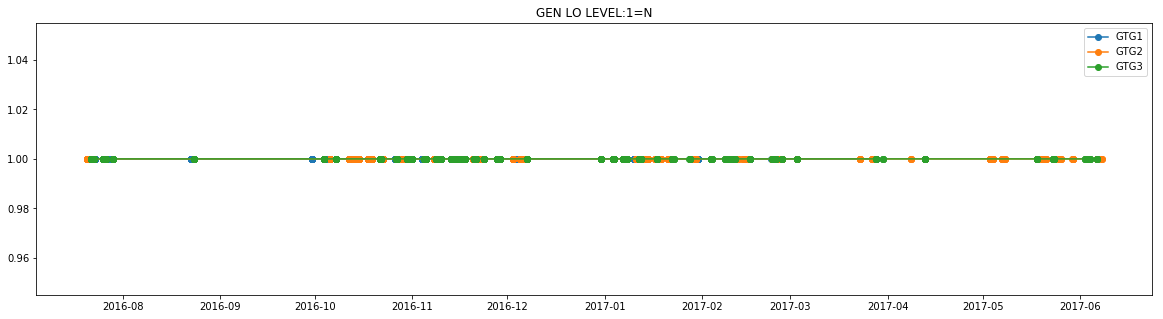

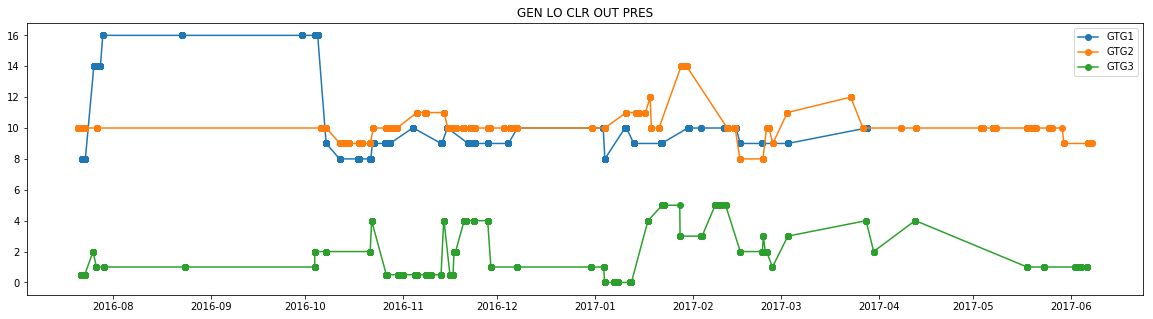

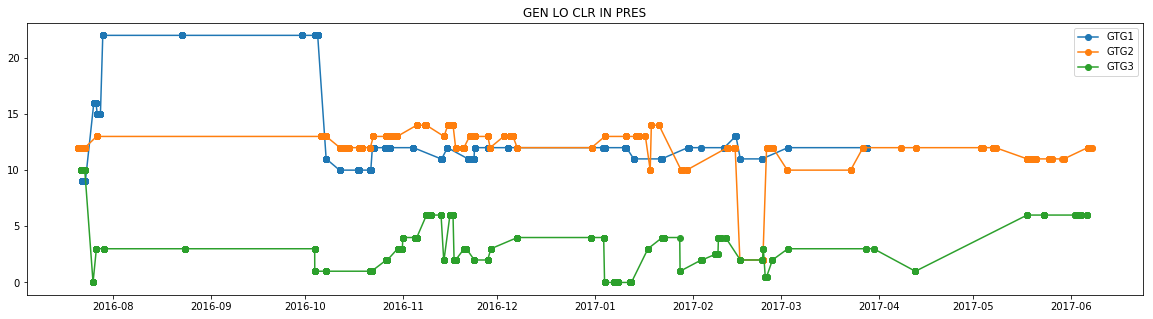

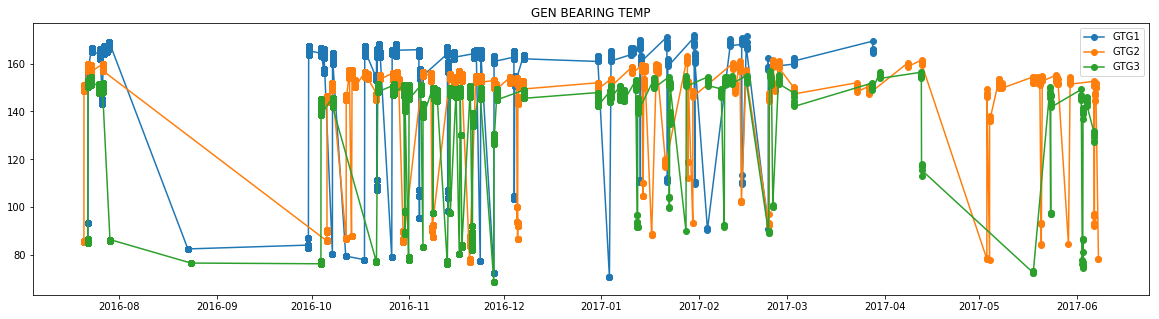

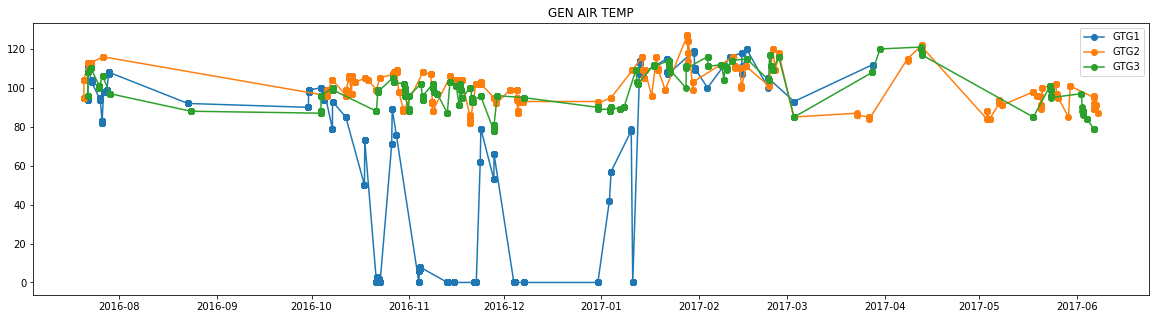

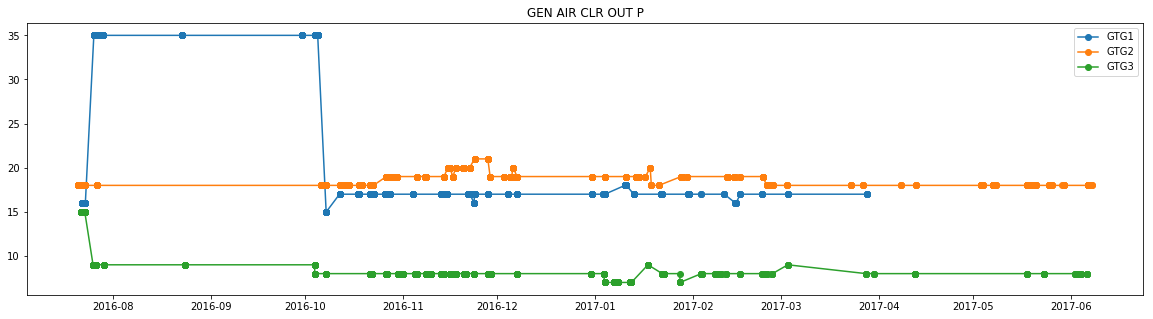

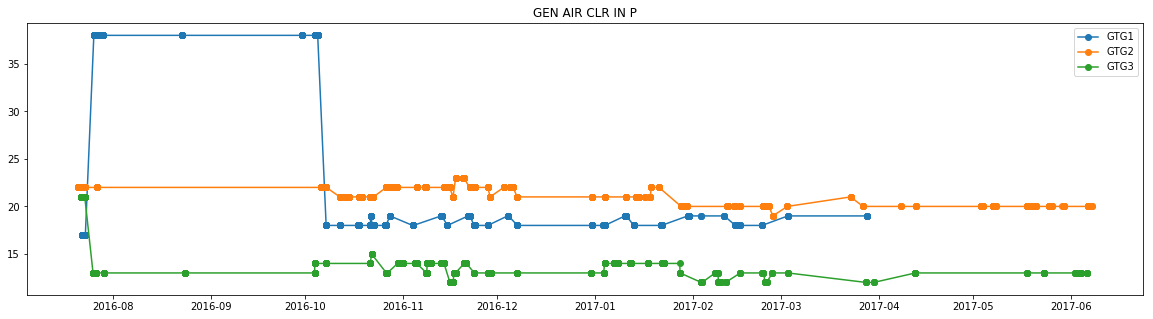

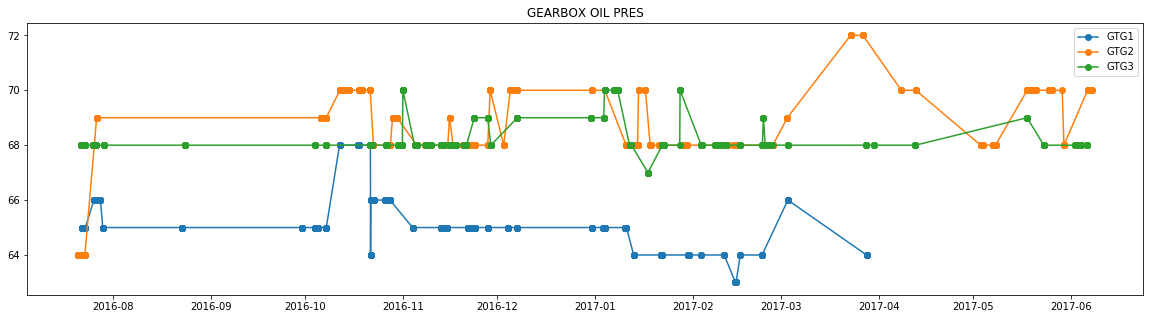

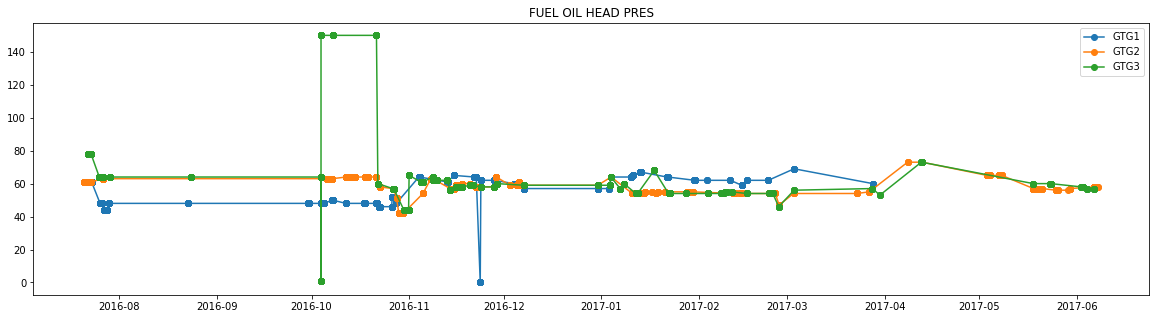

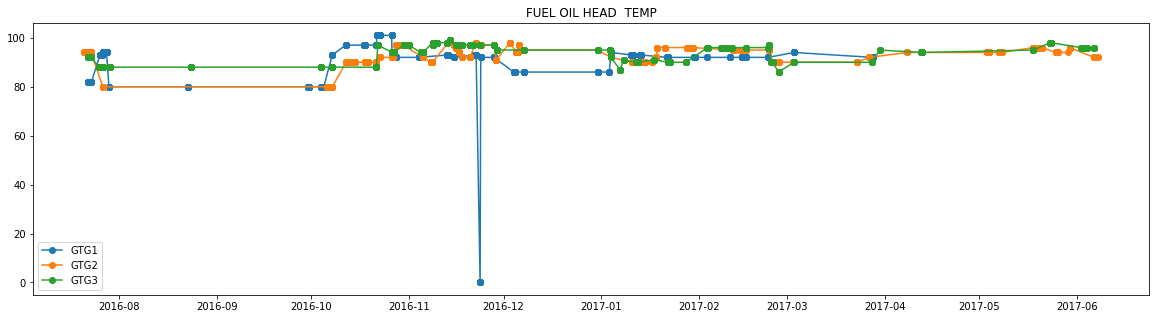

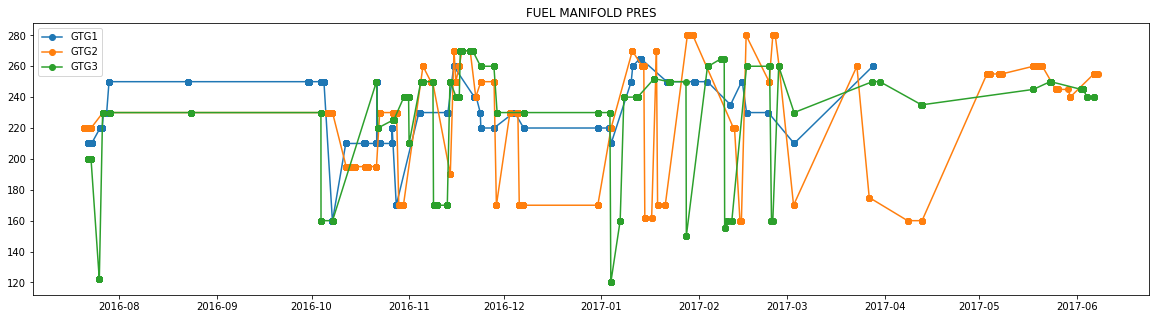

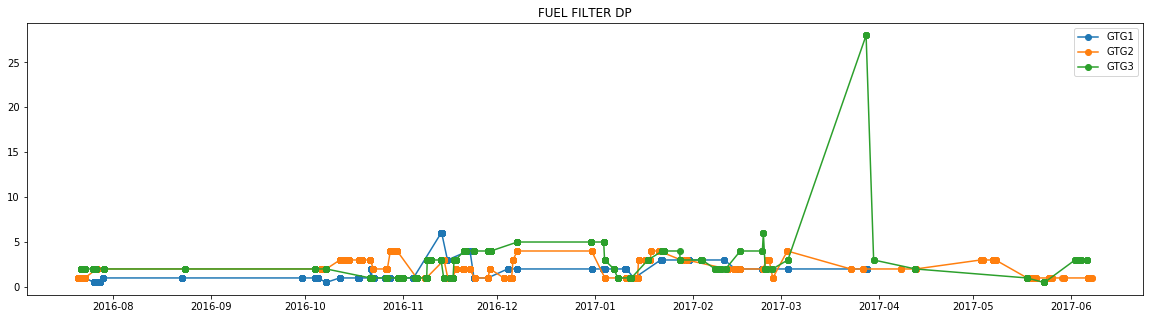

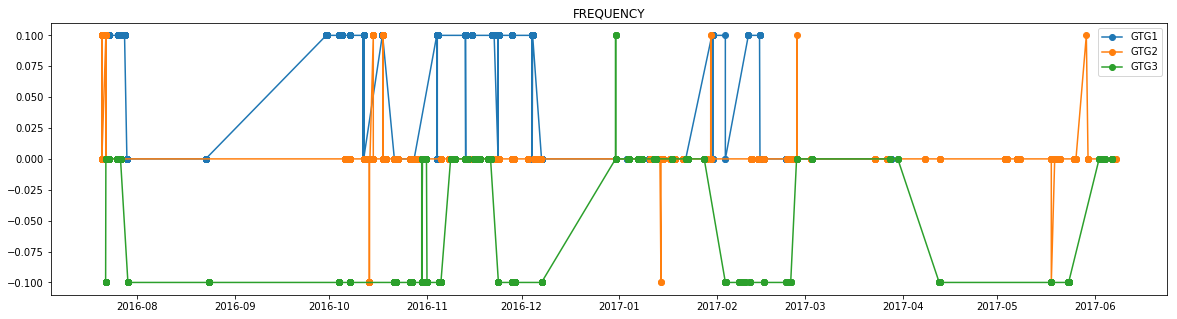

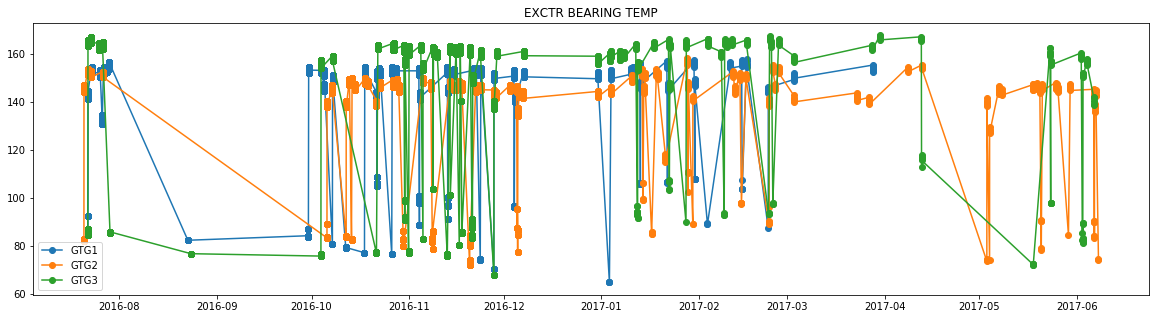

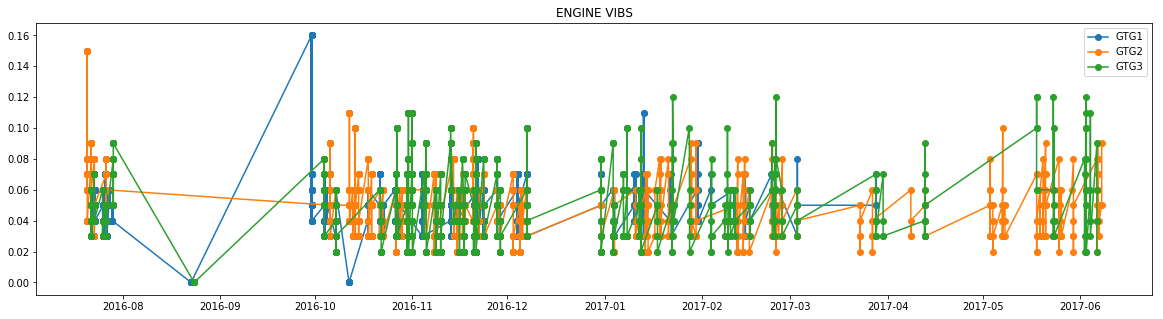

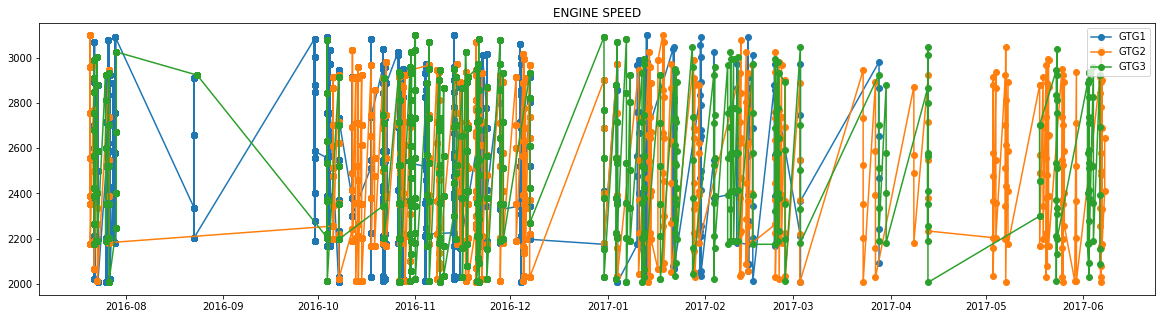

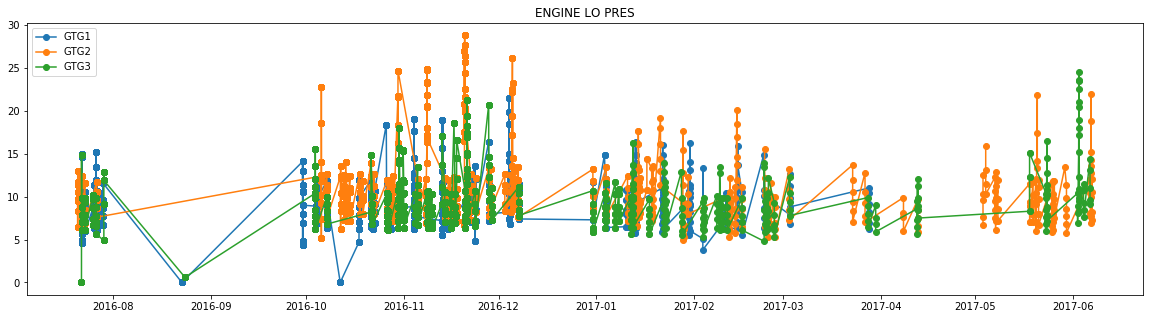

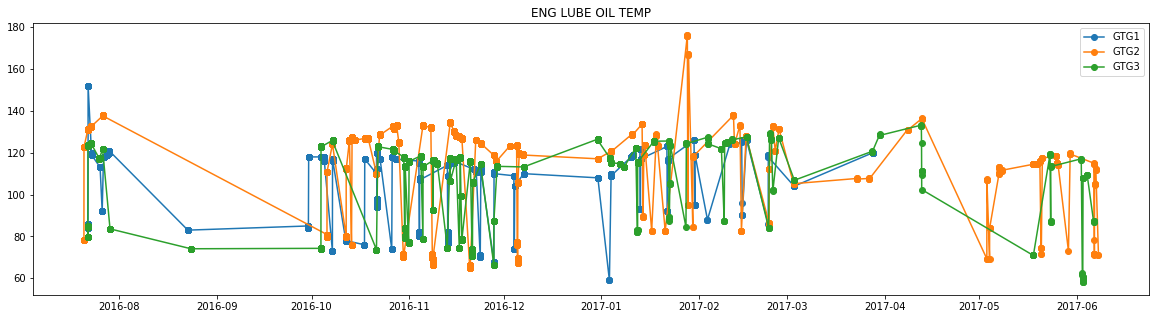

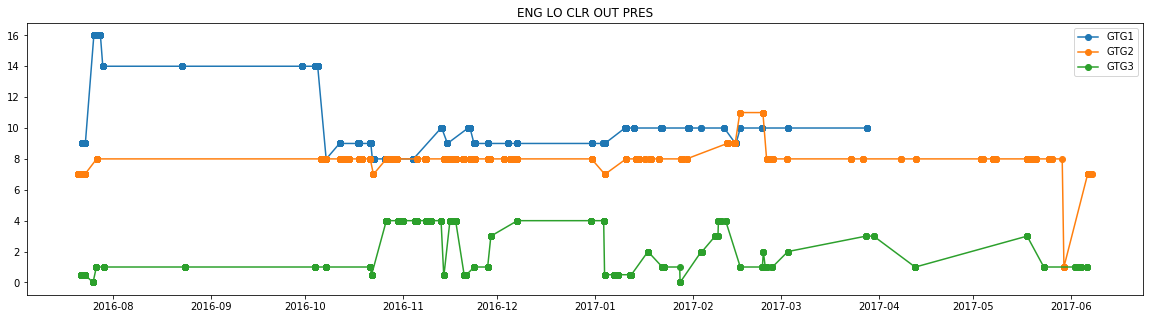

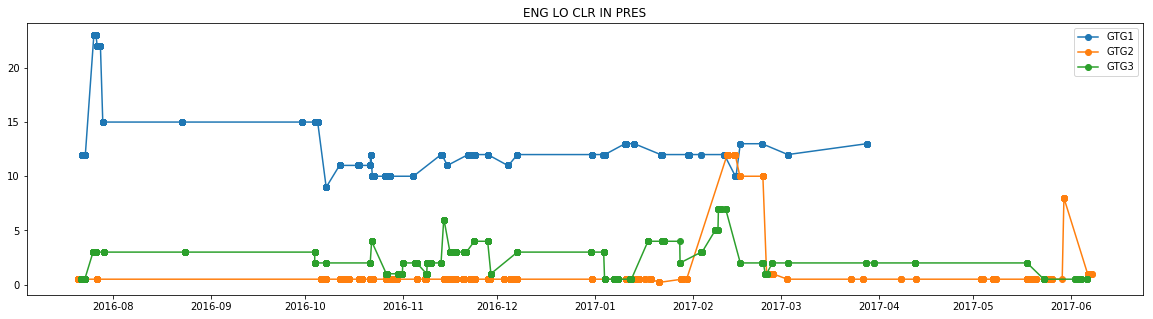

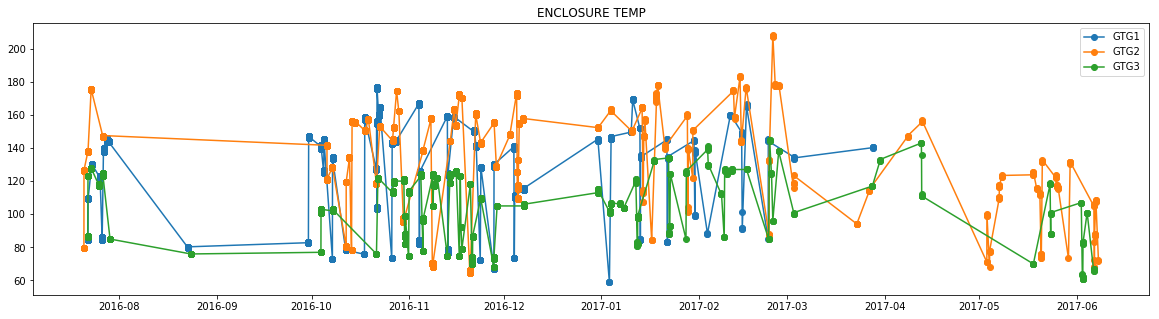

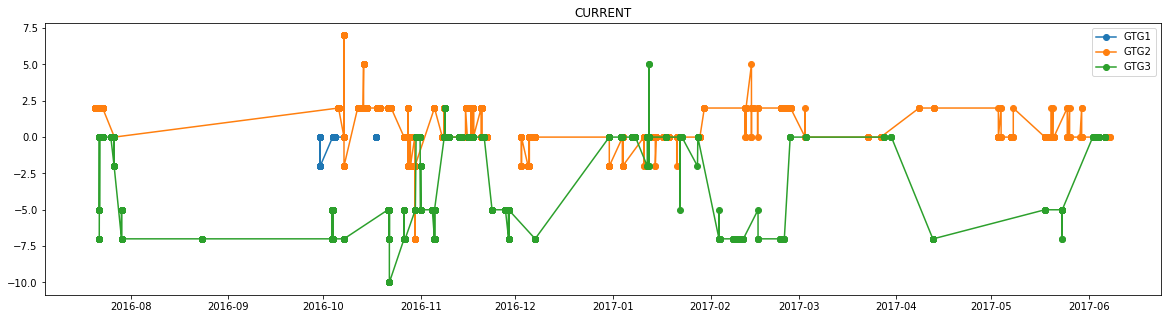

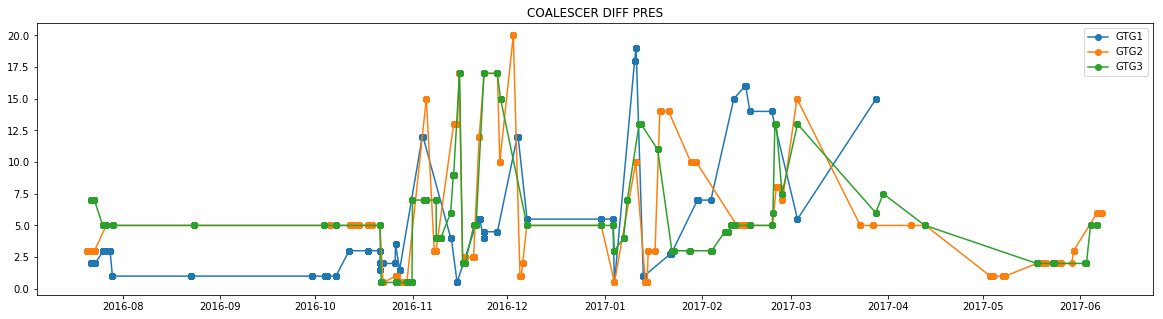

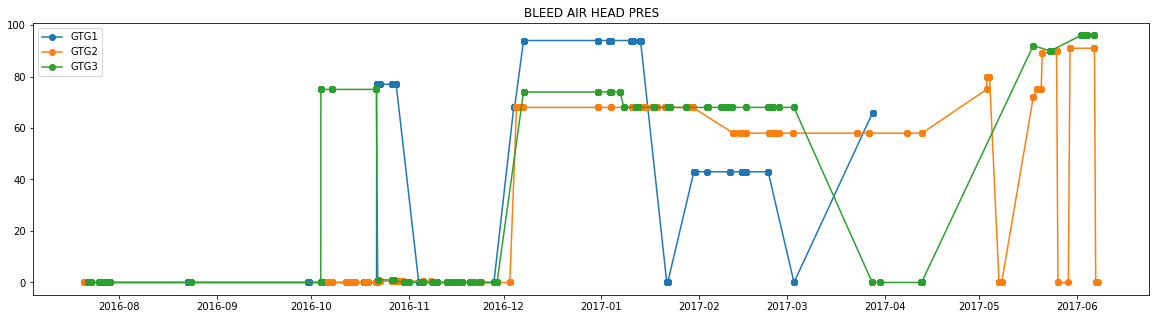

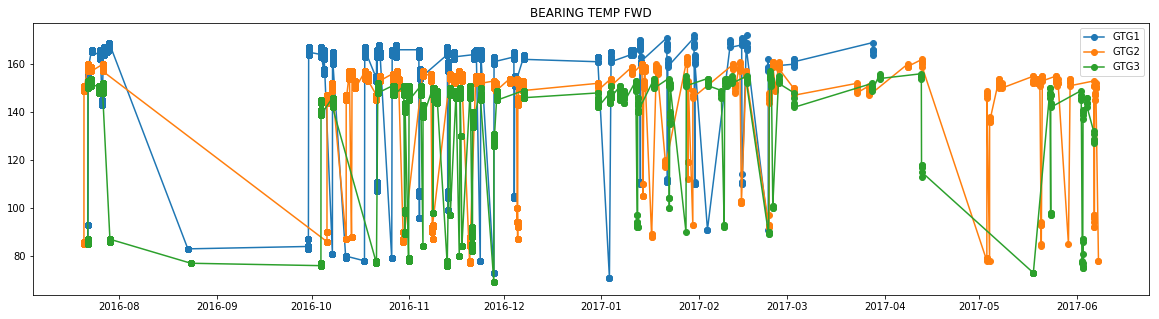

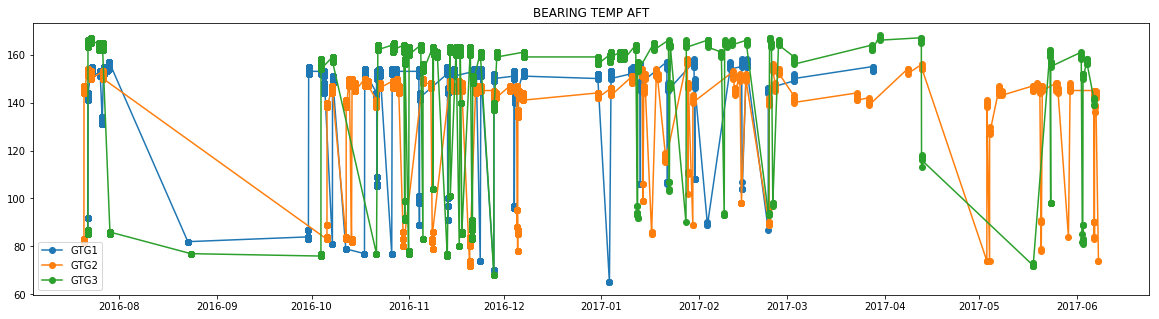

In [12]:
# Create time series plots for all sensors on A1
for name in colNames:
    fig = plt.figure(figsize=(20,5))
    for key, grp in A1_allGTG.groupby(['indicator']):
        plt.plot(grp['DateTime'],grp[name], label=key, marker='o')
    plt.title(name)
    plt.legend(loc='best')    
    plt.show()
    fig.savefig(name+'.png')
    